## Detectores de puntos de interes
Revision de librerias disponibles
 


In [4]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
#print(dir(cv2))

>**Obtencion de datos de MS COCO DATASET**

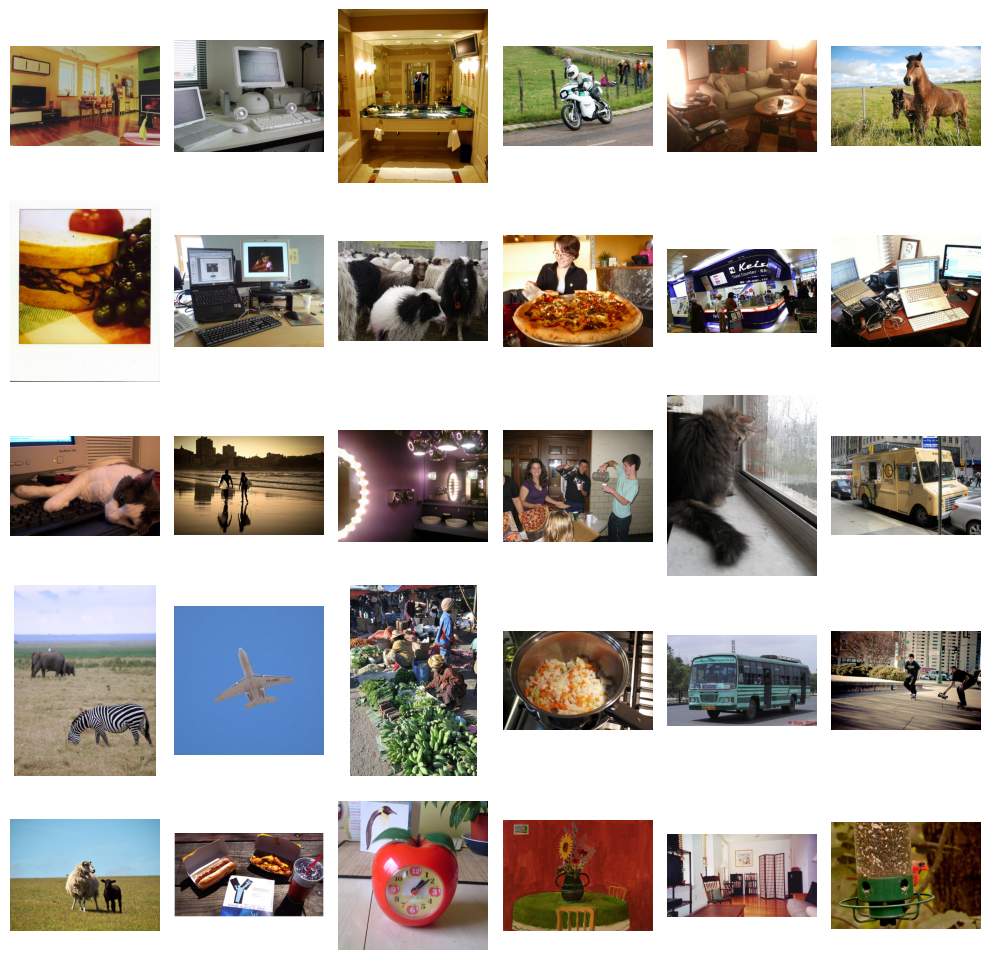

In [5]:
def load_set_fotos():
    setFotos = []
    setFotos.append(cv2.imread('./val2017/000000000139.jpg'))
    setFotos.append(cv2.imread('./val2017/000000001503.jpg'))
    setFotos.append(cv2.imread('./val2017/000000009772.jpg'))
    setFotos.append(cv2.imread('./val2017/000000007816.jpg'))
    setFotos.append(cv2.imread('./val2017/000000106235.jpg'))
    setFotos.append(cv2.imread('./val2017/000000335450.jpg'))
    setFotos.append(cv2.imread('./val2017/000000339442.jpg'))
    setFotos.append(cv2.imread('./val2017/000000340894.jpg'))
    setFotos.append(cv2.imread('./val2017/000000360325.jpg'))
    setFotos.append(cv2.imread('./val2017/000000361238.jpg'))
    setFotos.append(cv2.imread('./val2017/000000361586.jpg'))
    setFotos.append(cv2.imread('./val2017/000000363840.jpg'))
    setFotos.append(cv2.imread('./val2017/000000364297.jpg'))
    setFotos.append(cv2.imread('./val2017/000000364557.jpg'))
    setFotos.append(cv2.imread('./val2017/000000376310.jpg'))
    setFotos.append(cv2.imread('./val2017/000000376093.jpg'))
    setFotos.append(cv2.imread('./val2017/000000377000.jpg'))
    setFotos.append(cv2.imread('./val2017/000000377946.jpg'))
    setFotos.append(cv2.imread('./val2017/000000379533.jpg'))
    setFotos.append(cv2.imread('./val2017/000000379453.jpg'))
    setFotos.append(cv2.imread('./val2017/000000378515.jpg'))
    setFotos.append(cv2.imread('./val2017/000000393838.jpg'))
    setFotos.append(cv2.imread('./val2017/000000394275.jpg'))
    setFotos.append(cv2.imread('./val2017/000000396200.jpg'))
    setFotos.append(cv2.imread('./val2017/000000397639.jpg'))
    setFotos.append(cv2.imread('./val2017/000000400082.jpg'))
    setFotos.append(cv2.imread('./val2017/000000407825.jpg'))
    setFotos.append(cv2.imread('./val2017/000000415238.jpg'))
    setFotos.append(cv2.imread('./val2017/000000416534.jpg'))
    setFotos.append(cv2.imread('./val2017/000000421834.jpg'))
    return setFotos




def mostrar_set_fotos(fotos):
    fig, ax = plt.subplots(5,6,figsize=(10,10))
    for i, ax in enumerate(ax.flat):
        if i < len(fotos):
            ax.imshow(cv2.cvtColor(fotos[i], cv2.COLOR_BGR2RGB))
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()
    
def agregar_ruido_gaussiano(img, media=0, sigma=25):
    ruido = np.random.normal(media, sigma, img.shape).astype(np.float32)
    img_ruido = img.astype(np.float32) + ruido
    img_ruido = np.clip(img_ruido, 0, 255).astype(np.uint8)
    return img_ruido

def transformar_fotos(fotos):
    fotos_varia_brillo = []
    fotos_desenfoque = []
    fotos_oclusion = []
    fotos_ruido_gauss = []
    
    for img in fotos:
        ima = img.copy()
        var_brillo_img =cv2.convertScaleAbs(ima, alpha=1.5, beta=2.5)
        ima = img.copy()
        desenfoque_img = cv2.GaussianBlur(ima, (9,9), 3)
        ima = img.copy()
        x, y, w, h = 50, 50, 100, 100
        oclusion_img = cv2.rectangle(ima,(x, y), (x+w, y+h), (0, 0, 0), -1)
        ima = img.copy()
        ruido_gauss_img = agregar_ruido_gaussiano(ima, sigma=30)
        
        fotos_varia_brillo.append(var_brillo_img)
        fotos_desenfoque.append(desenfoque_img)
        fotos_oclusion.append(oclusion_img)
        fotos_ruido_gauss.append(ruido_gauss_img)
    return fotos_varia_brillo, fotos_desenfoque, fotos_oclusion, fotos_ruido_gauss

fotos = load_set_fotos()
mostrar_set_fotos(fotos)
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
#mostrar_set_fotos(f_varia_brillo)
#mostrar_set_fotos(f_desenfoque)
#mostrar_set_fotos(f_oclusion)
#mostrar_set_fotos(f_ruido_gauss)

tipos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]
nombres = ['original', 'brillo', 'desenfoque', 'oclusion', 'ruido gauss']


>HARRIS CORNER DETECTOR

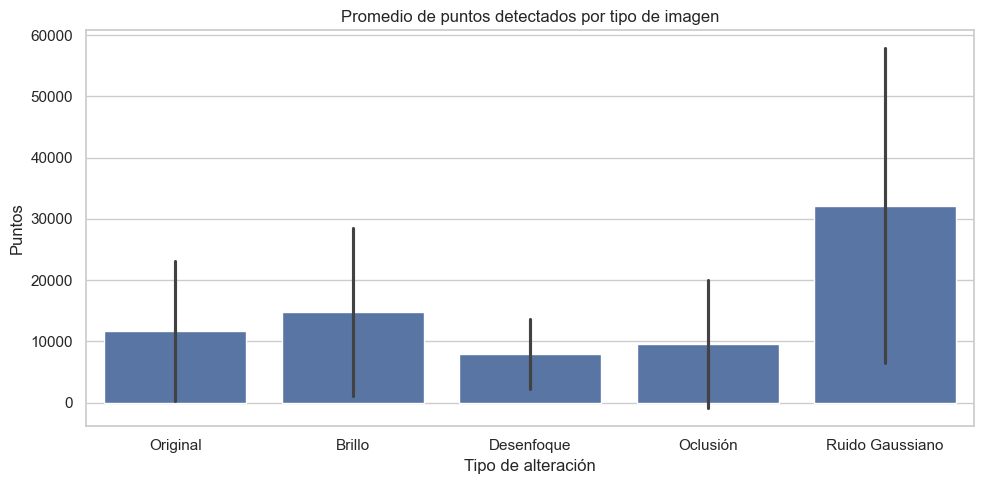

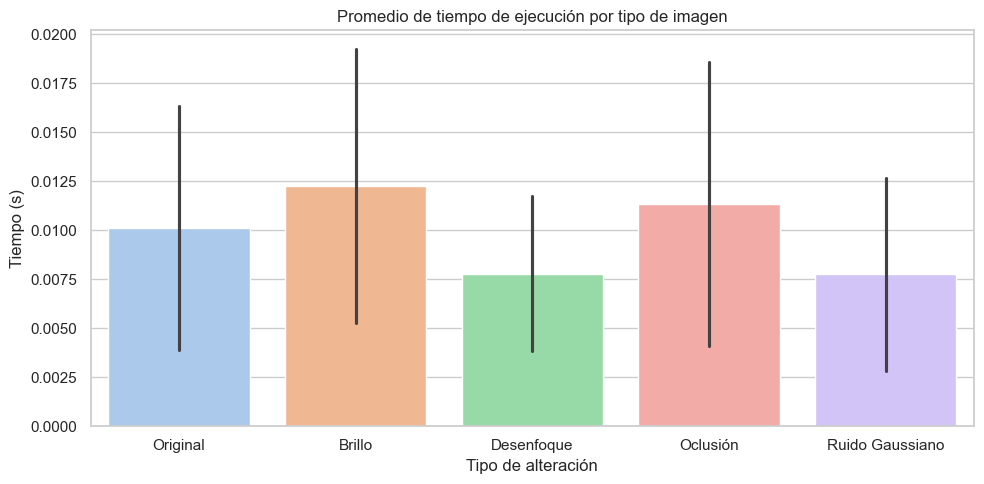

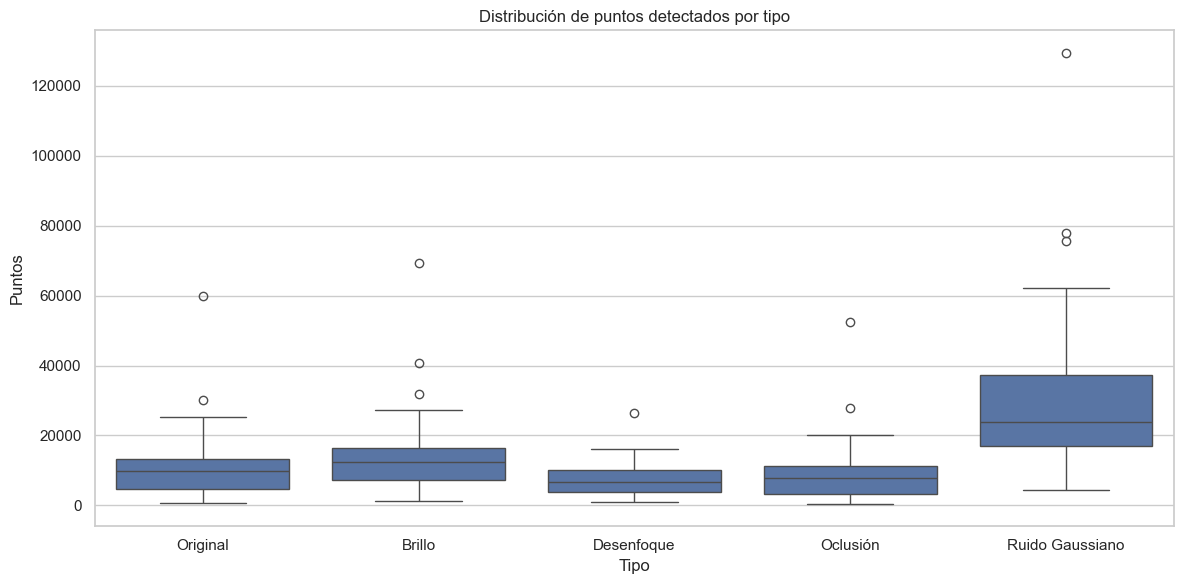

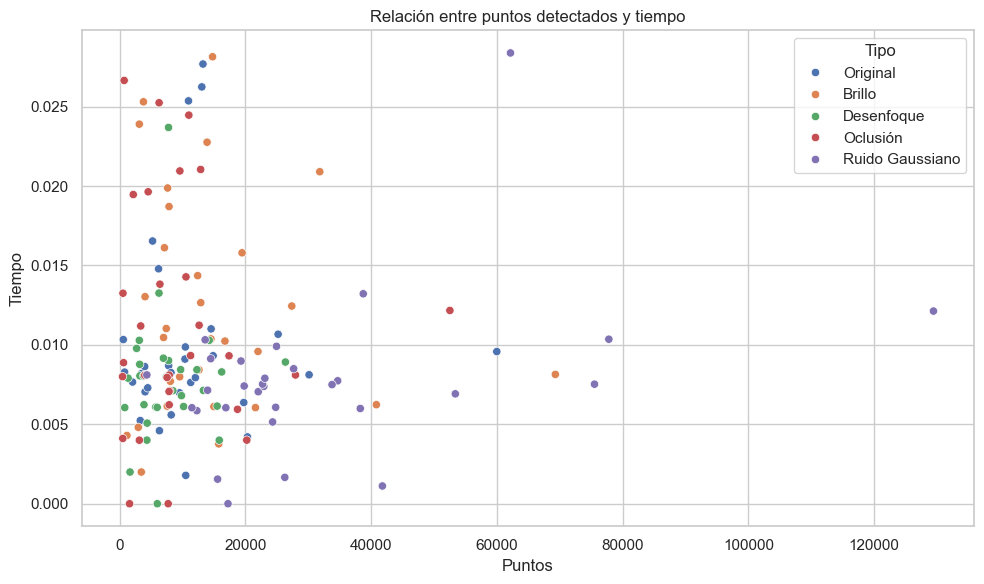

Robustez promedio por tipo de alteración:
Tipo
Robustez_Brillo             1.407278
Robustez_Desenfoque         0.959798
Robustez_Oclusión           0.788722
Robustez_Ruido Gaussiano    6.514478
dtype: float64


In [16]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

def detectar_puntos_harris(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    puntos = len(np.where(dst > 0.01 * dst.max())[0])
    return puntos

resultados = []
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_harris(img.copy())
        tiempo = time.time() - inicio
        resultados.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df = pd.DataFrame(resultados)
df_harris = df.copy()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados por tipo de imagen")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)

plt.title("Promedio de tiempo de ejecución por tipo de imagen")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos detectados y tiempo")
plt.tight_layout()
plt.show()

# Promedio por tipo
promedios = df.groupby('Tipo')['Puntos'].mean()
originales = df[df['Tipo'] == 'Original']['Puntos'].values

# Calcular robustez (por imagen)
df_robustez = df.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez[f'Robustez_{tipo}'] = df_robustez[tipo] / df_robustez['Original']

robustez_promedio = df_robustez[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("Robustez promedio por tipo de alteración:")
print(robustez_promedio)


>SIFT Scale Invariant Feature Transform

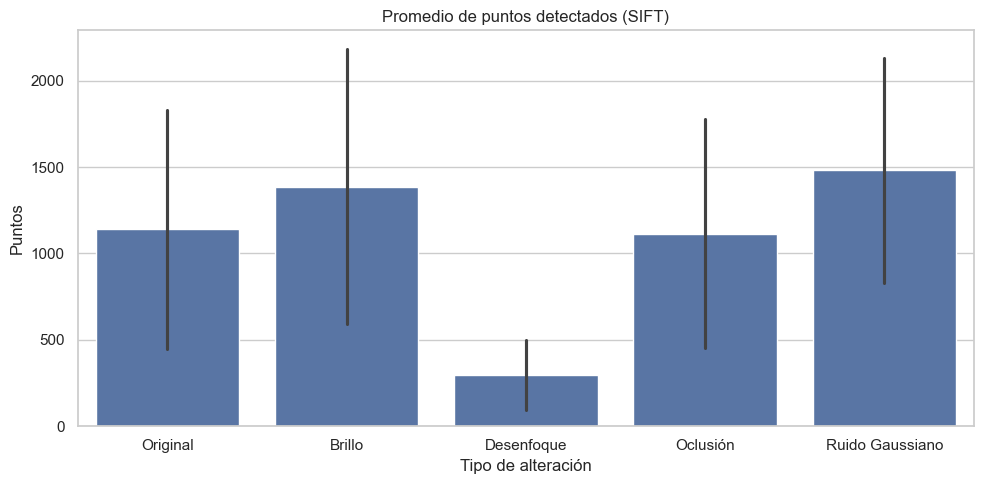

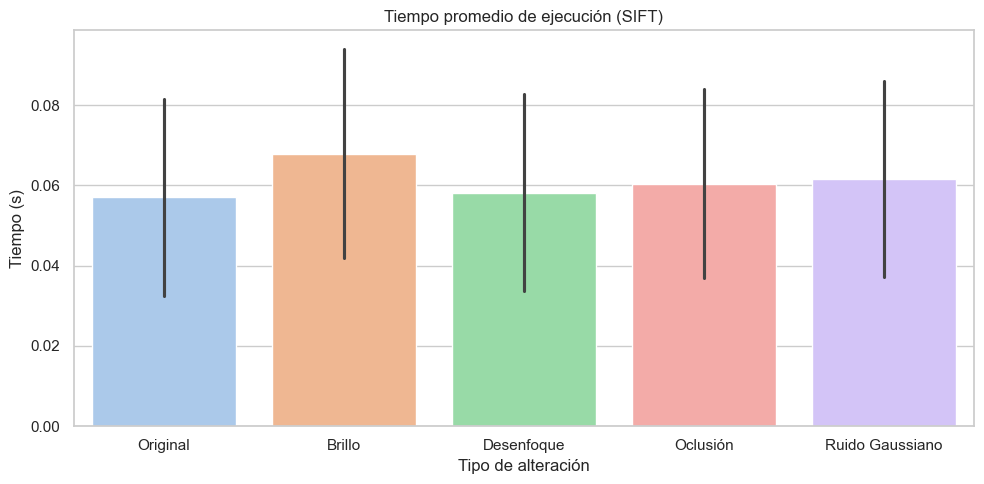

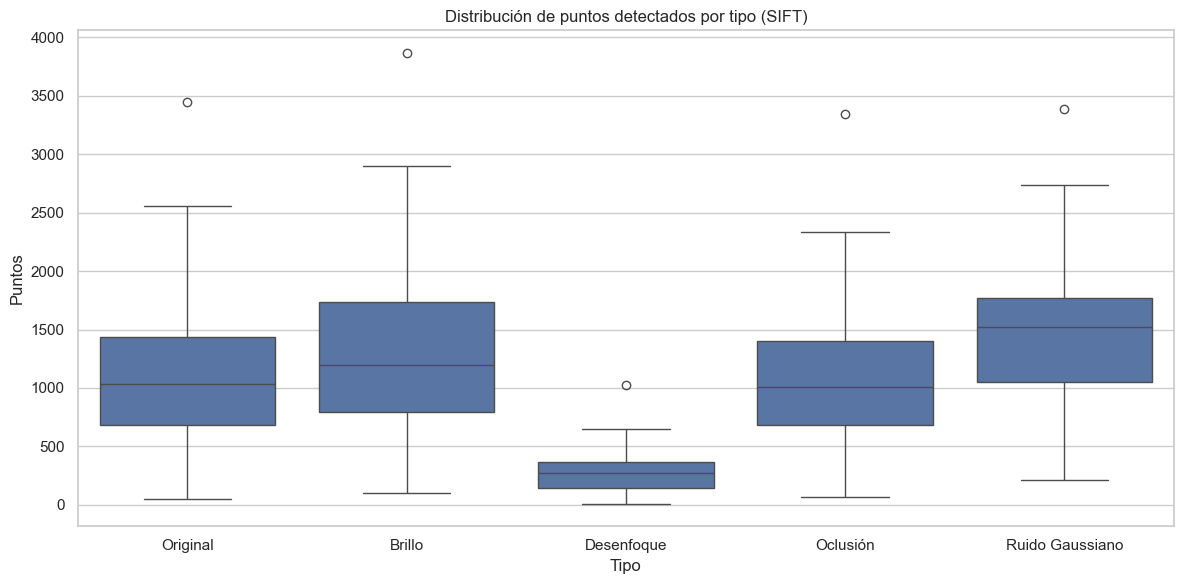

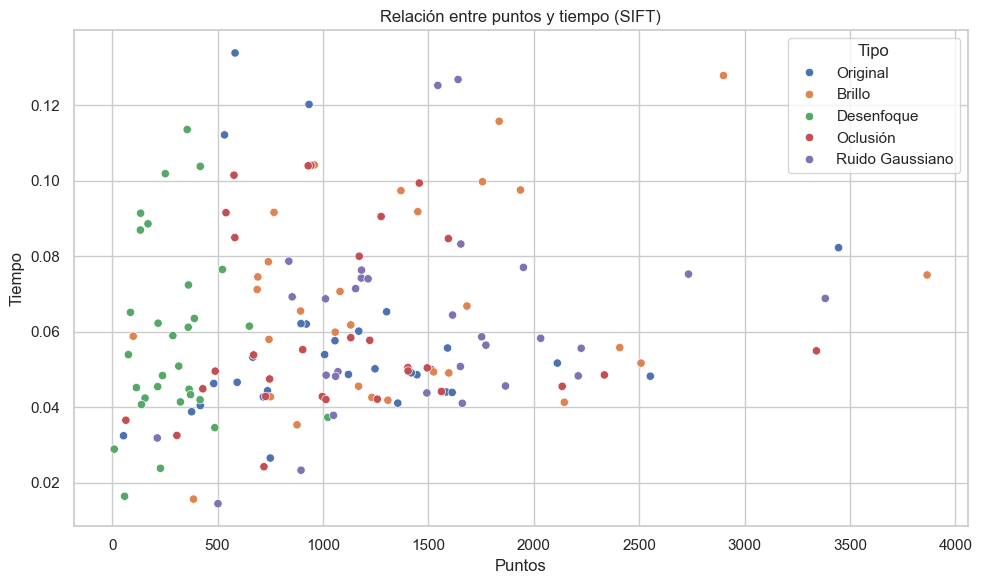


Robustez promedio por tipo de alteración (SIFT):
Tipo
Robustez_Brillo             1.261287
Robustez_Desenfoque         0.254094
Robustez_Oclusión           0.988339
Robustez_Ruido Gaussiano    1.508107
dtype: float64


In [7]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

def detectar_puntos_sift(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(gray, None)
    return len(kp)

# Cargar datos
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

# Analizar imágenes
resultados_sift = []
for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_sift(img.copy())
        tiempo = time.time() - inicio
        resultados_sift.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df_sift = pd.DataFrame(resultados_sift)

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_sift, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (SIFT)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_sift, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (SIFT)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sift, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (SIFT)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sift, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (SIFT)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_sift = df_sift.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_sift[f'Robustez_{tipo}'] = df_robustez_sift[tipo] / df_robustez_sift['Original']

robustez_prom_sift = df_robustez_sift[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (SIFT):")
print(robustez_prom_sift)


>FAST CORNER DETECTOR

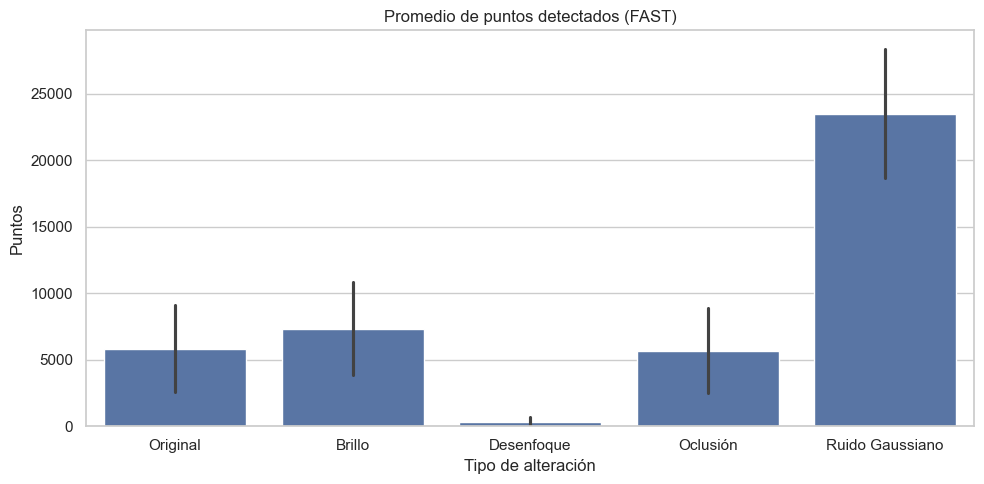

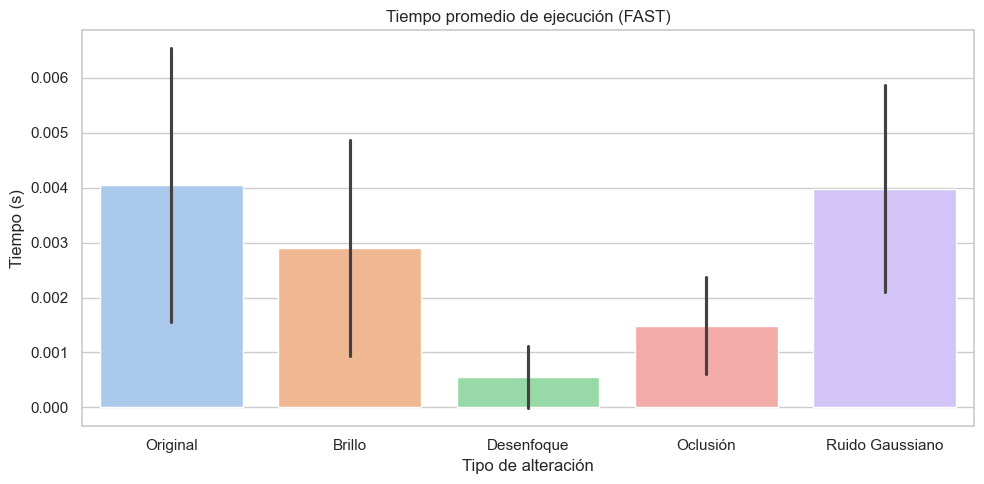

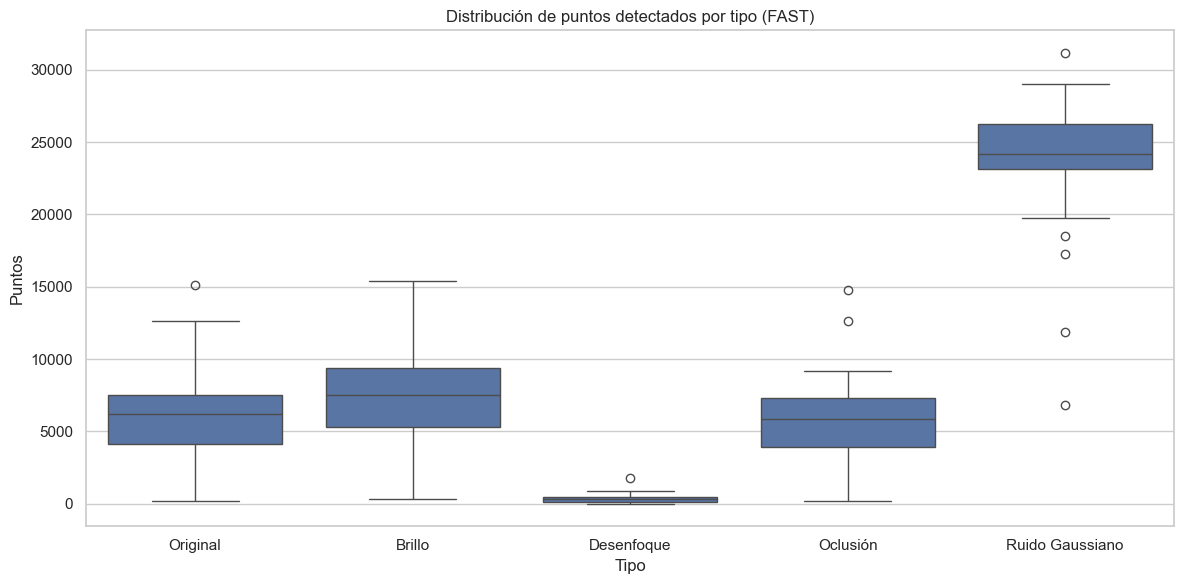

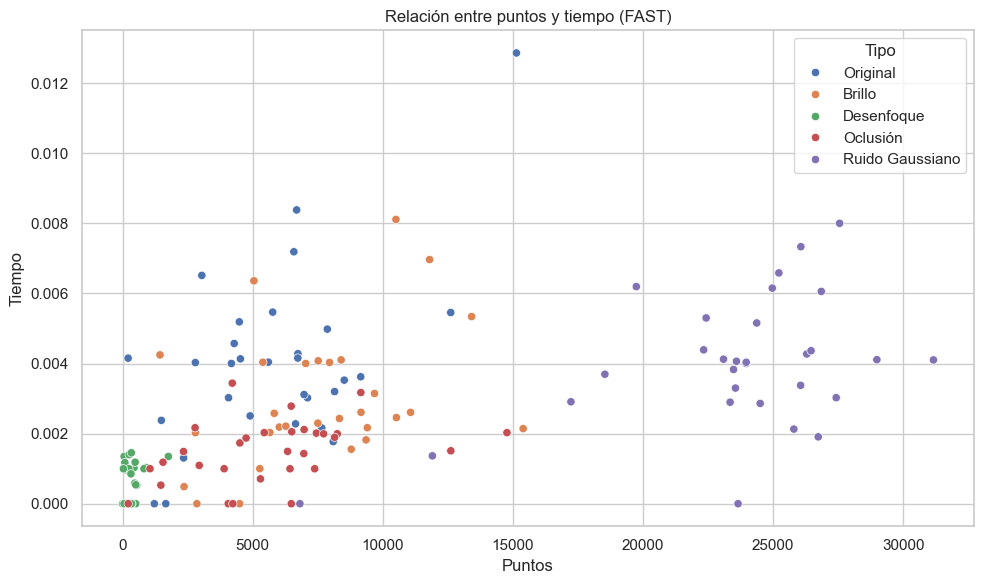


Robustez promedio por tipo de alteración (FAST):
Tipo
Robustez_Brillo             1.332974
Robustez_Desenfoque         0.057553
Robustez_Oclusión           0.969775
Robustez_Ruido Gaussiano    7.734611
dtype: float64


In [8]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")

def detectar_puntos_fast(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fast = cv2.FastFeatureDetector_create()
    kp = fast.detect(gray, None)
    return len(kp)

# Preparar datos
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

resultados_fast = []
for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_fast(img.copy())
        tiempo = time.time() - inicio
        resultados_fast.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df_fast = pd.DataFrame(resultados_fast)

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_fast, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (FAST)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_fast, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (FAST)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fast, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (FAST)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fast, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (FAST)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_fast = df_fast.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_fast[f'Robustez_{tipo}'] = df_robustez_fast[tipo] / df_robustez_fast['Original']

robustez_prom_fast = df_robustez_fast[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (FAST):")
print(robustez_prom_fast)


> SURF SPEEDED UP ROBUST FEATURES

In [32]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def detectar_puntos_surf(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    surf = cv2.xfeatures2d.SURF_create(400)
    kp = surf.detect(gray, None)
    return len(kp)

# Cargar imágenes y transformaciones
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

# Procesamiento y almacenamiento de resultados
resultados_surf = []
for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_surf(img.copy())
        tiempo = time.time() - inicio
        resultados_surf.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df_surf = pd.DataFrame(resultados_surf)

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_surf, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (SURF)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_surf, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (SURF)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_surf, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (SURF)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_surf, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (SURF)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_surf = df_surf.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_surf[f'Robustez_{tipo}'] = df_robustez_surf[tipo] / df_robustez_surf['Original']

robustez_prom_surf = df_robustez_surf[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (SURF):")
print(robustez_prom_surf)


AttributeError: module 'cv2' has no attribute 'xfeatures2d'

>ORB Oriented FAST and Rotated BRIEF

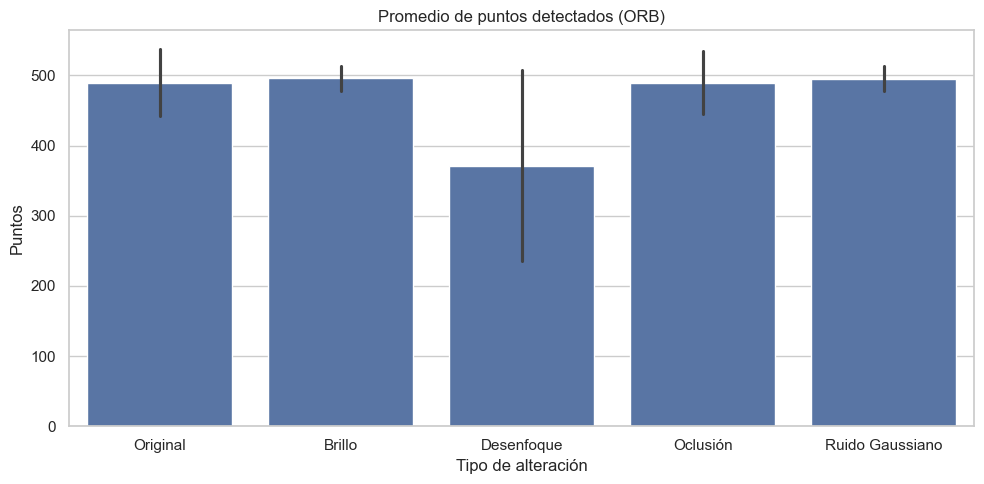

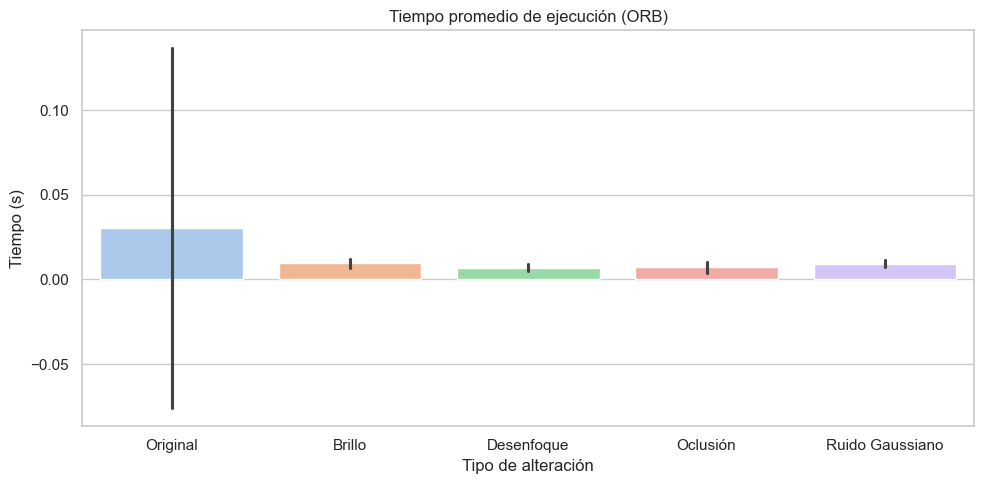

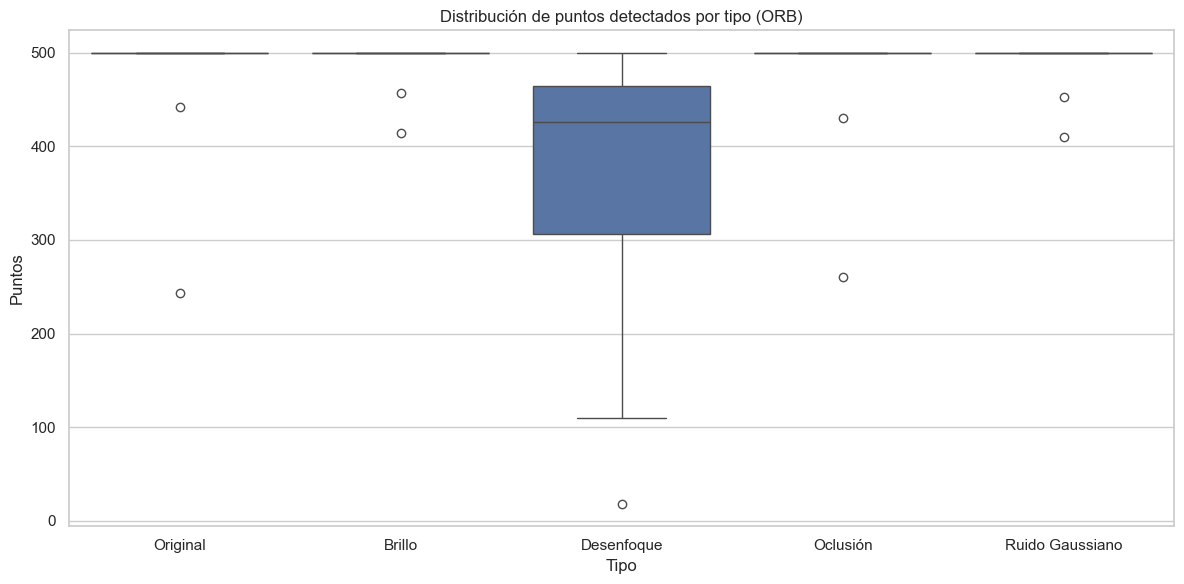

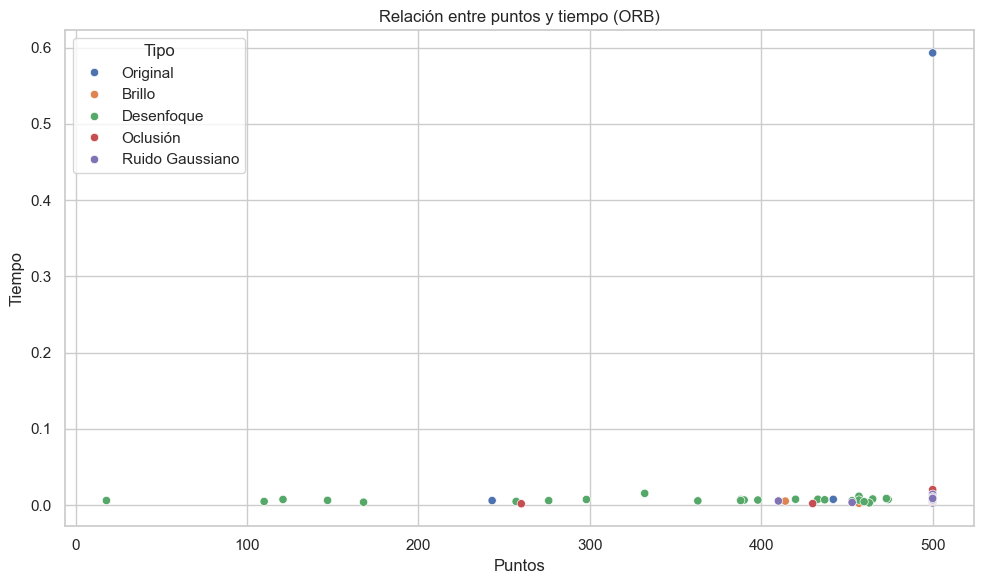


Robustez promedio por tipo de alteración (ORB):
Tipo
Robustez_Brillo             1.024588
Robustez_Desenfoque         0.745298
Robustez_Oclusión           1.001427
Robustez_Ruido Gaussiano    1.023738
dtype: float64


In [12]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

def detectar_puntos_orb(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    kp = orb.detect(gray, None)
    kp, des = orb.compute(img, kp)
    return len(kp)

# Cargar y transformar imágenes
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

resultados_orb = []
for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_orb(img.copy())
        tiempo = time.time() - inicio
        resultados_orb.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df_orb = pd.DataFrame(resultados_orb)

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_orb, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (ORB)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_orb, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (ORB)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orb, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (ORB)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_orb, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (ORB)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_orb = df_orb.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_orb[f'Robustez_{tipo}'] = df_robustez_orb[tipo] / df_robustez_orb['Original']

robustez_prom_orb = df_robustez_orb[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (ORB):")
print(robustez_prom_orb)
    

> BRISK Binary Robust Invariant Scalable Keypoints

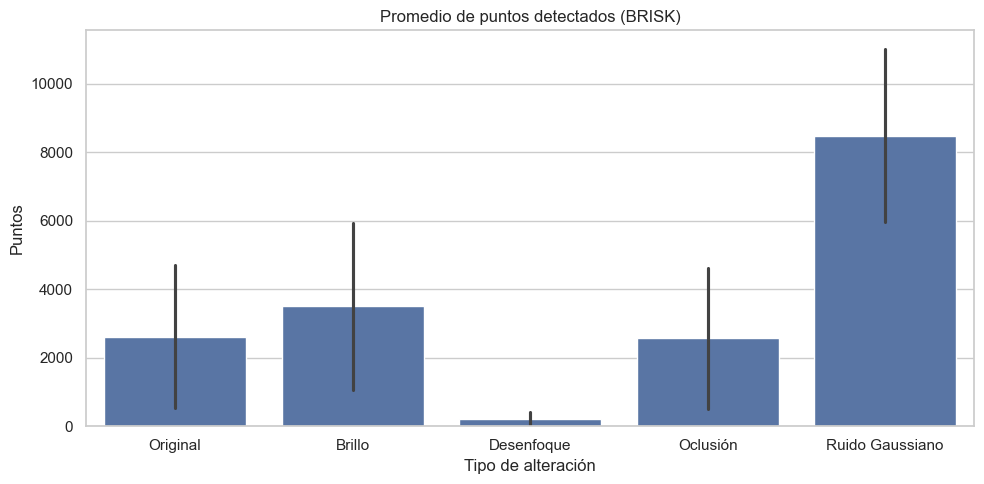

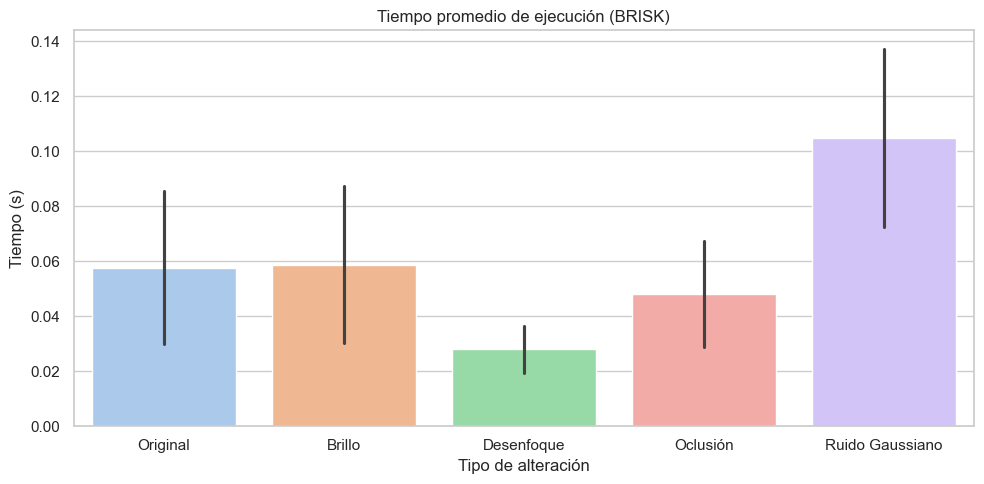

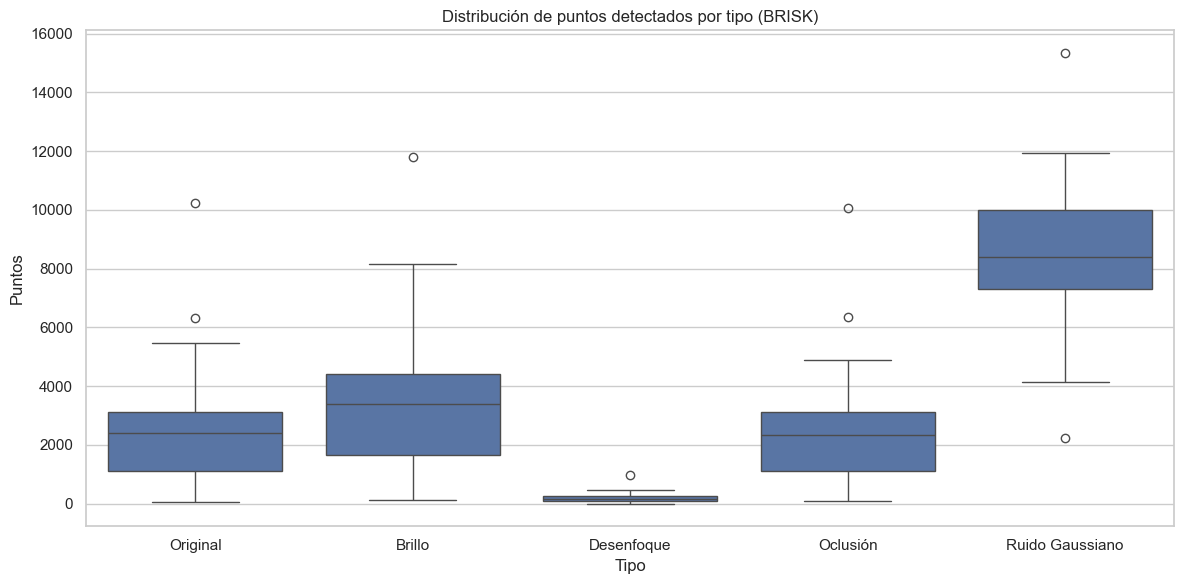

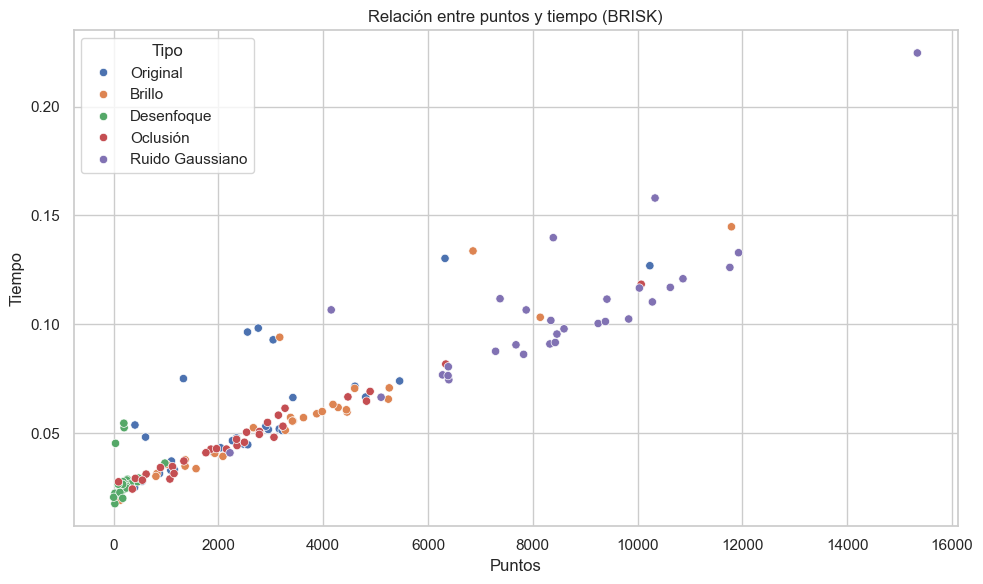


Robustez promedio por tipo de alteración (BRISK):
Tipo
Robustez_Brillo             1.441250
Robustez_Desenfoque         0.086948
Robustez_Oclusión           0.990127
Robustez_Ruido Gaussiano    6.453377
dtype: float64


In [13]:
import cv2
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def detectar_puntos_brisk(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brisk = cv2.BRISK_create()
    kp = brisk.detect(gray, None)
    return len(kp)

# Cargar y transformar imágenes
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']
fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]

resultados_brisk = []
for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        inicio = time.time()
        puntos = detectar_puntos_brisk(img.copy())
        tiempo = time.time() - inicio
        resultados_brisk.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': puntos,
            'Tiempo': tiempo
        })

df_brisk = pd.DataFrame(resultados_brisk)

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_brisk, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (BRISK)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_brisk, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (BRISK)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_brisk, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (BRISK)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_brisk, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (BRISK)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_brisk = df_brisk.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_brisk[f'Robustez_{tipo}'] = df_robustez_brisk[tipo] / df_robustez_brisk['Original']

robustez_prom_brisk = df_robustez_brisk[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (BRISK):")
print(robustez_prom_brisk)


>AKAZE Accelerated-KAZE

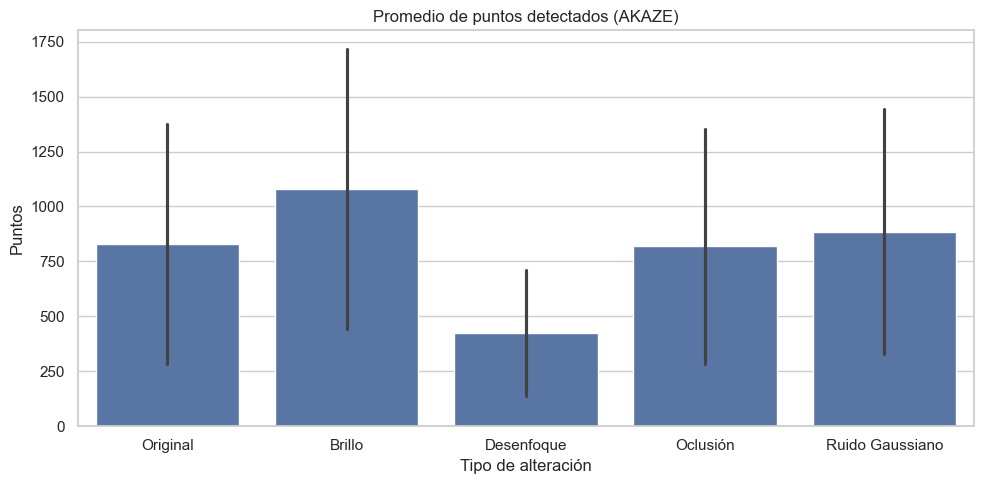

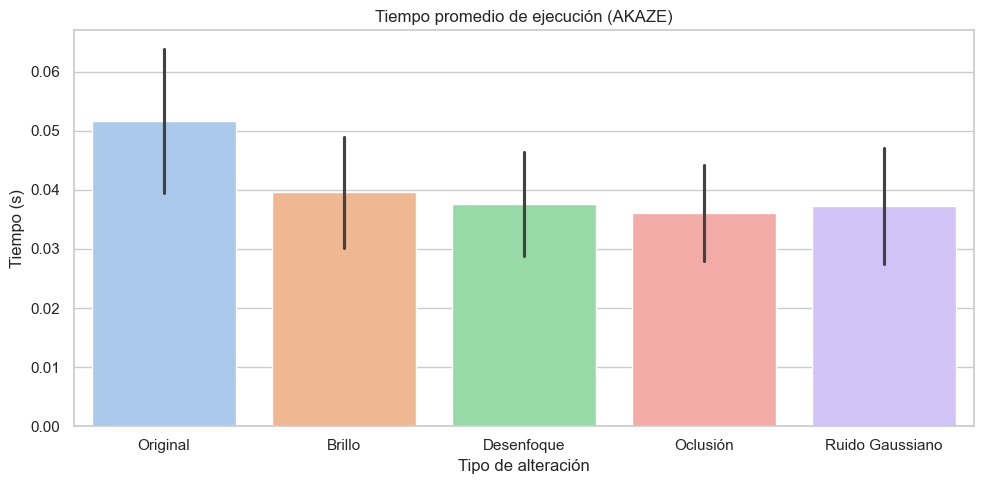

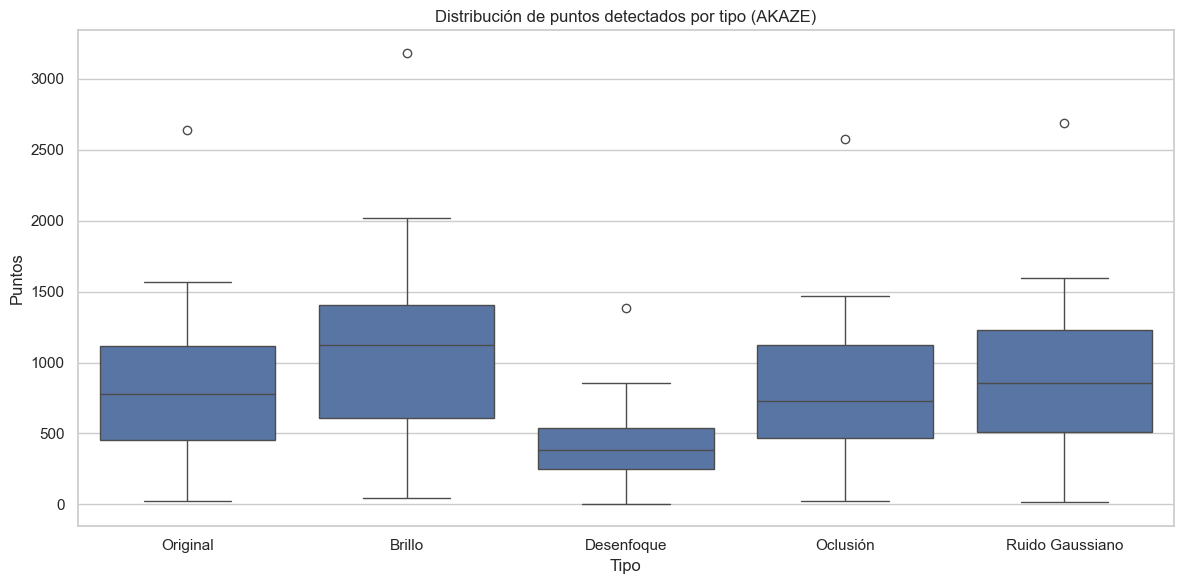

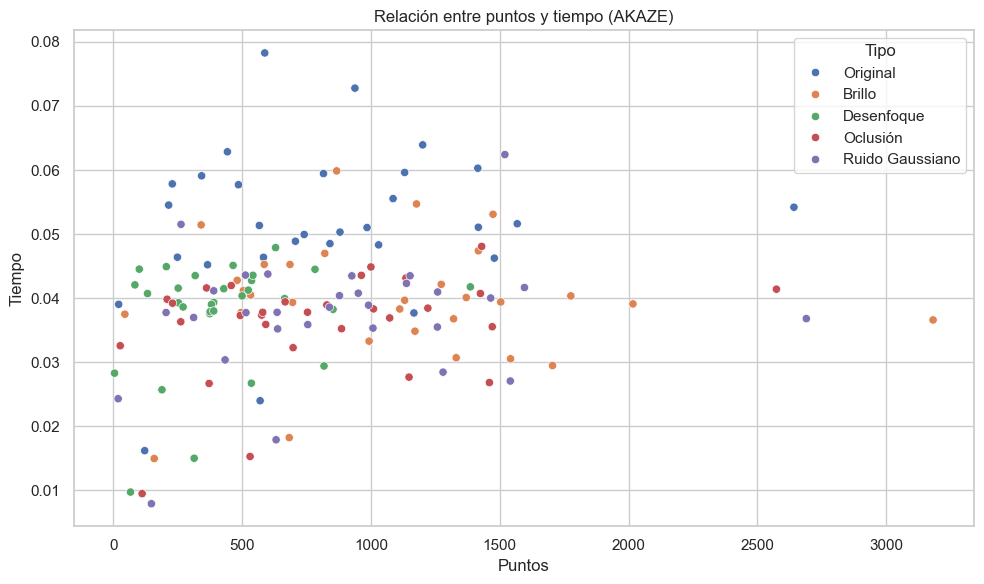


Robustez promedio por tipo de alteración (AKAZE):
Tipo
Robustez_Brillo             1.410933
Robustez_Desenfoque         0.506468
Robustez_Oclusión           1.001183
Robustez_Ruido Gaussiano    1.084094
dtype: float64


In [28]:
import time
import pandas as pd
import cv2

fotos = load_set_fotos()
f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss = transformar_fotos(fotos)
grupos = [fotos, f_varia_brillo, f_desenfoque, f_oclusion, f_ruido_gauss]
tipos = ['Original', 'Brillo', 'Desenfoque', 'Oclusión', 'Ruido Gaussiano']

resultados_akaze = []

for tipo, grupo in zip(tipos, grupos):
    for i, img in enumerate(grupo):
        start = time.time()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        akaze = cv2.AKAZE_create()
        kp = akaze.detect(gray, None)
        end = time.time()
        
        resultados_akaze.append({
            'Imagen': i + 1,
            'Tipo': tipo,
            'Puntos': len(kp),
            'Tiempo': end - start
        })

df_akaze = pd.DataFrame(resultados_akaze)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegúrate de haber importado también: pandas como pd, y tener `df_akaze` ya creado.
sns.set(style="whitegrid")

# ------------------- GRAFICAR RESULTADOS -------------------

plt.figure(figsize=(10, 5))
sns.barplot(data=df_akaze, x='Tipo', y='Puntos', estimator=np.mean, errorbar='sd')
plt.title("Promedio de puntos detectados (AKAZE)")
plt.ylabel("Puntos")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_akaze, x='Tipo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='pastel', hue='Tipo', legend=False)
plt.title("Tiempo promedio de ejecución (AKAZE)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_akaze, x='Tipo', y='Puntos')
plt.title("Distribución de puntos detectados por tipo (AKAZE)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_akaze, x='Puntos', y='Tiempo', hue='Tipo')
plt.title("Relación entre puntos y tiempo (AKAZE)")
plt.tight_layout()
plt.show()

# ------------------- MÉTRICA DE ROBUSTEZ -------------------

df_robustez_akaze = df_akaze.pivot(index='Imagen', columns='Tipo', values='Puntos')
for tipo in tipos[1:]:
    df_robustez_akaze[f'Robustez_{tipo}'] = df_robustez_akaze[tipo] / df_robustez_akaze['Original']

robustez_prom_akaze = df_robustez_akaze[[f'Robustez_{t}' for t in tipos[1:]]].mean()
print("\nRobustez promedio por tipo de alteración (AKAZE):")
print(robustez_prom_akaze)


In [22]:
df_harris['Metodo'] = 'Harris'
df_sift['Metodo'] = 'SIFT'
df_fast['Metodo'] = 'FAST'
df_orb['Metodo'] = 'ORB'
df_brisk['Metodo'] = 'BRISK'
df_akaze['Metodo'] = 'AKAZE'

df_comparacion = pd.concat([df_harris, df_sift, df_fast, df_orb, df_brisk,df_akaze], ignore_index=True)



C:\Users\Luis\AppData\Local\Temp\ipykernel_24972\1204978674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_comparacion, x='Metodo', y='Puntos', estimator=np.mean, errorbar='sd', palette='Set2')


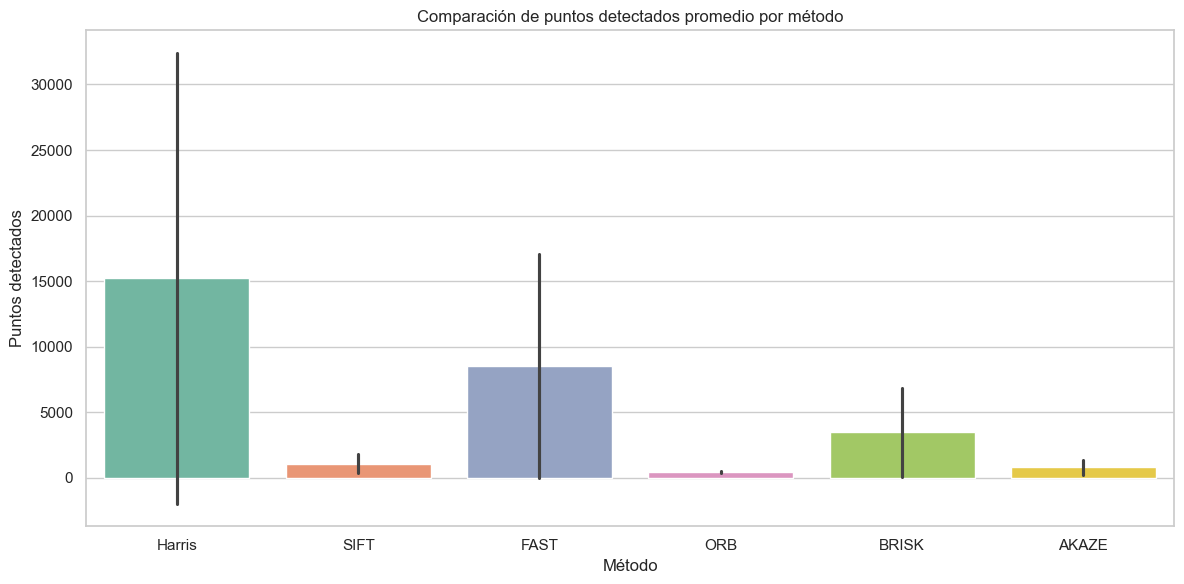

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparacion, x='Metodo', y='Puntos', estimator=np.mean, errorbar='sd', palette='Set2')
plt.title("Comparación de puntos detectados promedio por método")
plt.ylabel("Puntos detectados")
plt.xlabel("Método")
plt.tight_layout()
plt.show()


C:\Users\Luis\AppData\Local\Temp\ipykernel_24972\583639227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_comparacion, x='Metodo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='Set3')


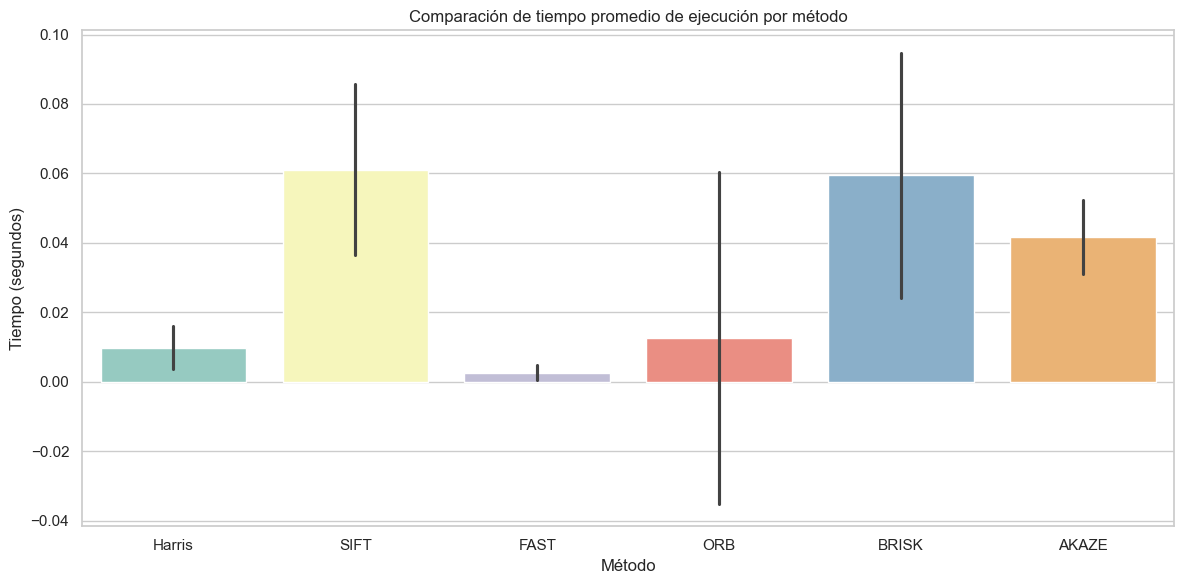

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparacion, x='Metodo', y='Tiempo', estimator=np.mean, errorbar='sd', palette='Set3')
plt.title("Comparación de tiempo promedio de ejecución por método")
plt.ylabel("Tiempo (segundos)")
plt.xlabel("Método")
plt.tight_layout()
plt.show()


In [26]:
def calcular_robustez(df, metodo):
    df_piv = df.pivot(index='Imagen', columns='Tipo', values='Puntos')
    tipos = [c for c in df_piv.columns if c != 'Original']
    for t in tipos:
        df_piv[f'Robustez_{t}'] = df_piv[t] / df_piv['Original']
    return df_piv[[f'Robustez_{t}' for t in tipos]].mean().rename(lambda x: x.replace('Robustez_', '')).to_frame(name=metodo)

robustez_harris = calcular_robustez(df_harris, 'Harris')
robustez_sift   = calcular_robustez(df_sift, 'SIFT')
robustez_fast   = calcular_robustez(df_fast, 'FAST')
robustez_orb    = calcular_robustez(df_orb, 'ORB')
robustez_brisk  = calcular_robustez(df_brisk, 'BRISK')
robustez_akaze  = calcular_robustez(df_akaze, 'AKAZE')

df_robustez_total = pd.concat([robustez_harris, robustez_sift, robustez_fast, robustez_orb, robustez_brisk, robustez_akaze], axis=1).T


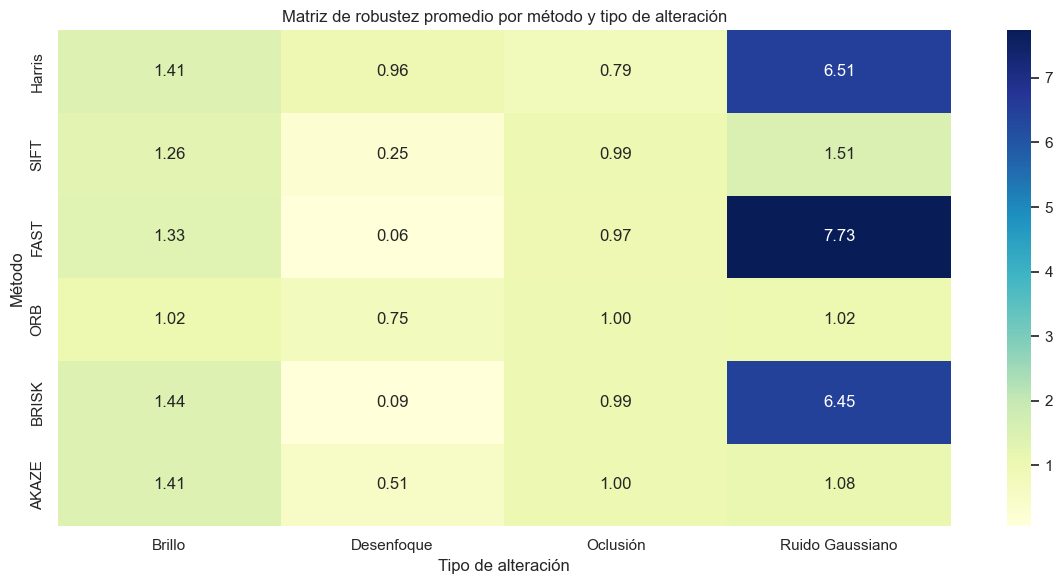

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_robustez_total, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de robustez promedio por método y tipo de alteración")
plt.ylabel("Método")
plt.xlabel("Tipo de alteración")
plt.tight_layout()
plt.show()
